<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [98]:
from typing import List
import requests

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    # add your code here
    features: ",".join(features)

    base_url = "https://archive-api.open-meteo.com/v1/archive"
    timezone = "GMT"  

    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone": timezone,
    }

    response = requests.get(base_url, params=params)
    response.raise_for_status()
    data = response.json() 
    return data

latitude = 51.5074  
longitude = -0.1278  
start_date = "1950-01-01"
end_date = "1954-12-31"
features = [
    "temperature_2m_max",
    "temperature_2m_min",
    "temperature_2m_mean",
    "precipitation_sum"
]


data = acquire_data(latitude, longitude, start_date, end_date, features)


print(data)


{'latitude': 51.5, 'longitude': -0.099990845, 'generationtime_ms': 1.85394287109375, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 16.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'temperature_2m_mean': '°C', 'precipitation_sum': 'mm'}, 'daily': {'time': ['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08', '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12', '1950-01-13', '1950-01-14', '1950-01-15', '1950-01-16', '1950-01-17', '1950-01-18', '1950-01-19', '1950-01-20', '1950-01-21', '1950-01-22', '1950-01-23', '1950-01-24', '1950-01-25', '1950-01-26', '1950-01-27', '1950-01-28', '1950-01-29', '1950-01-30', '1950-01-31', '1950-02-01', '1950-02-02', '1950-02-03', '1950-02-04', '1950-02-05', '1950-02-06', '1950-02-07', '1950-02-08', '1950-02-09', '1950-02-10', '1950-02-11', '1950-02-12', '1950-02-13', '1950-02-14', '1950-02-15', '1950-02-

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [99]:
# add your code here

import pandas as pd

df = pd.DataFrame(data['daily'])
print(df)

            time  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0     1950-01-01                 3.9                -1.7                  1.1   
1     1950-01-02                10.4                -0.3                  6.7   
2     1950-01-03                11.2                10.0                 10.5   
3     1950-01-04                10.5                 8.0                  9.2   
4     1950-01-05                 9.5                 5.6                  8.1   
...          ...                 ...                 ...                  ...   
1821  1954-12-27                 9.2                 5.3                  7.0   
1822  1954-12-28                 8.9                 4.6                  6.8   
1823  1954-12-29                 8.6                 6.2                  7.2   
1824  1954-12-30                 7.7                 5.1                  6.2   
1825  1954-12-31                 6.4                 1.0                  4.6   

      precipitation_sum  
0

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


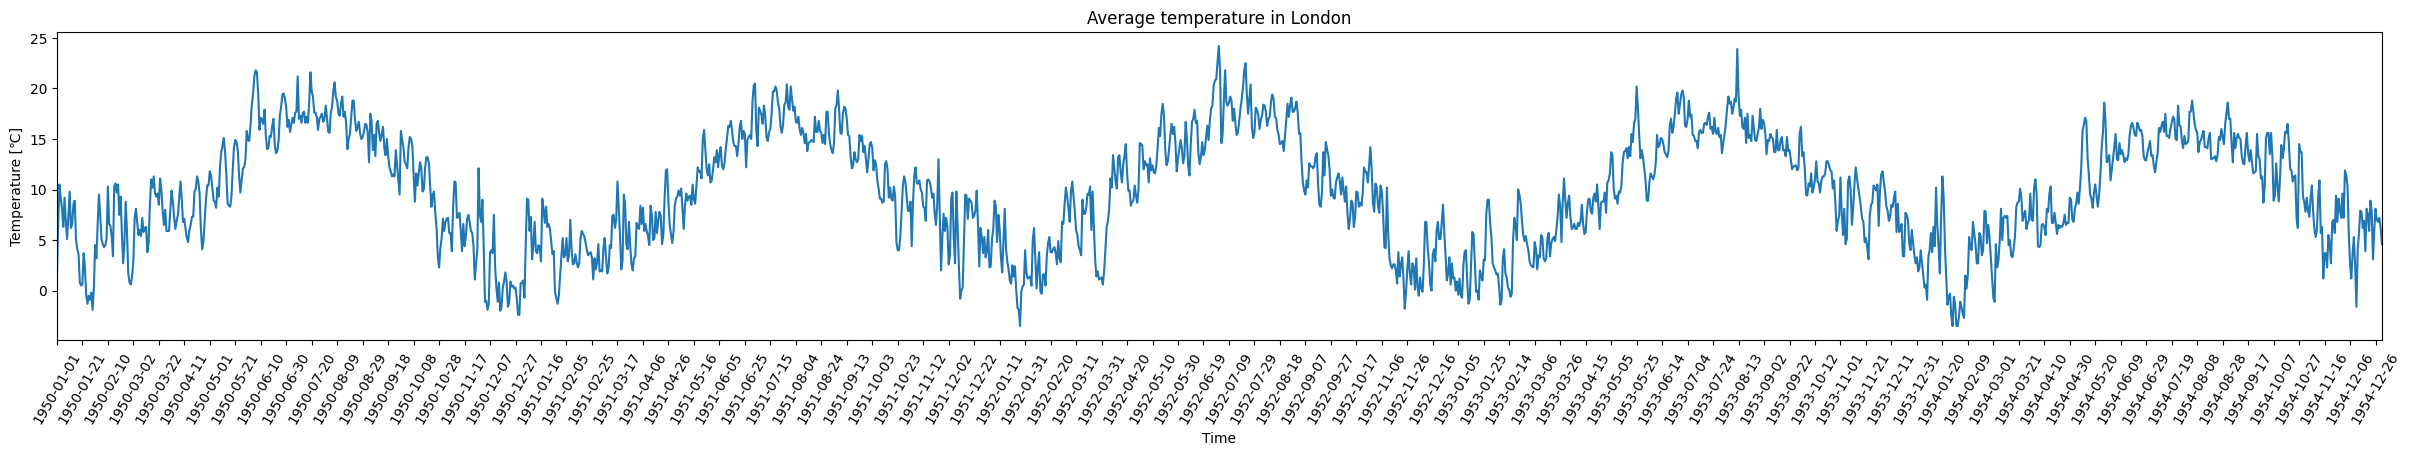

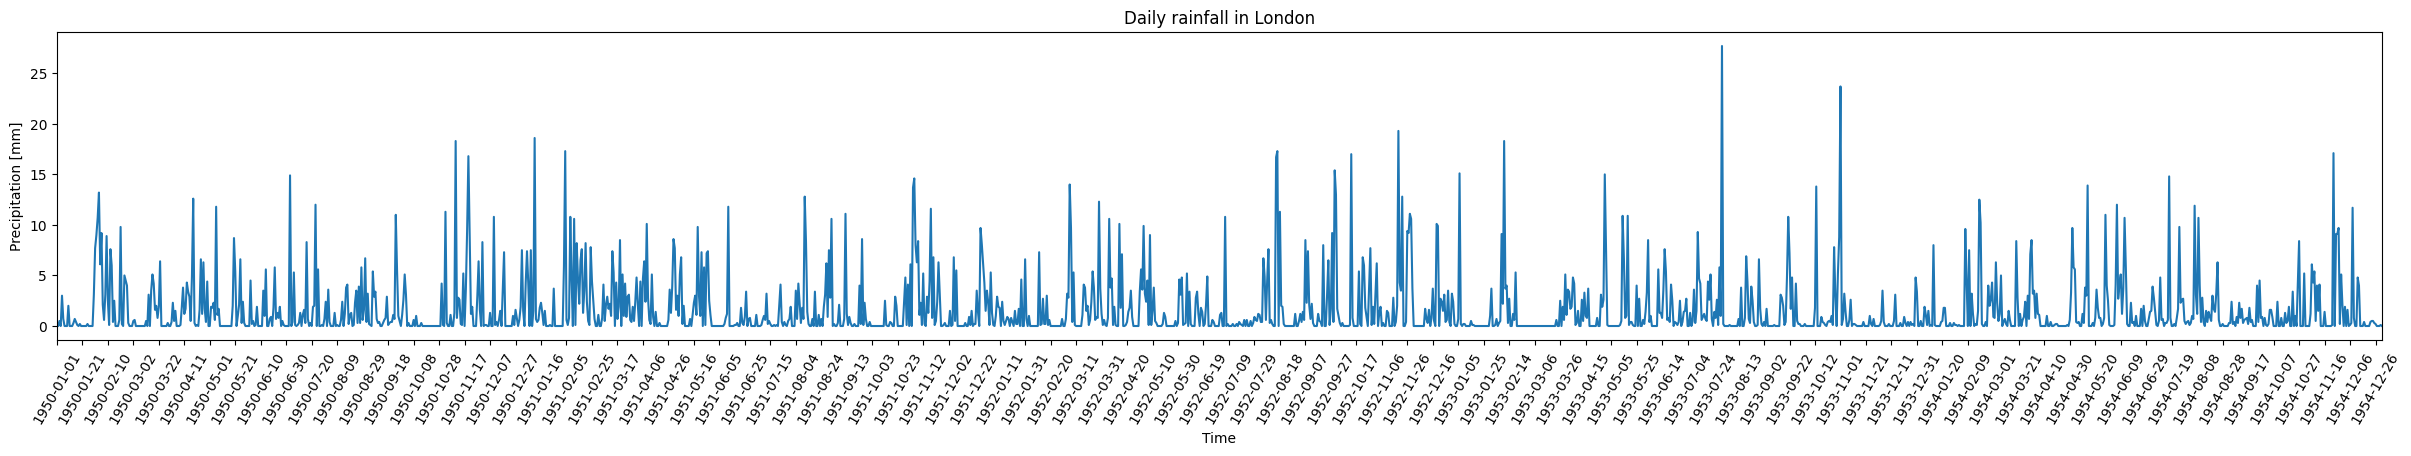

In [100]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    ax.plot(x,y)
    ax.margins(x=0)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation=60)
    return fig, ax

#get the data 
time_series = data.pop("daily")
x = time_series['time']
y = time_series['temperature_2m_mean']

#plot the temperature
fig, ax = lineplot(x, y, "Average temperature in London","Time","Temperature [℃]")
plt.show()

x = time_series['time']
y = time_series['precipitation_sum']

fig, ax = lineplot(x, y, "Daily rainfall in London","Time","Precipitation [mm]")
plt.show()

    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

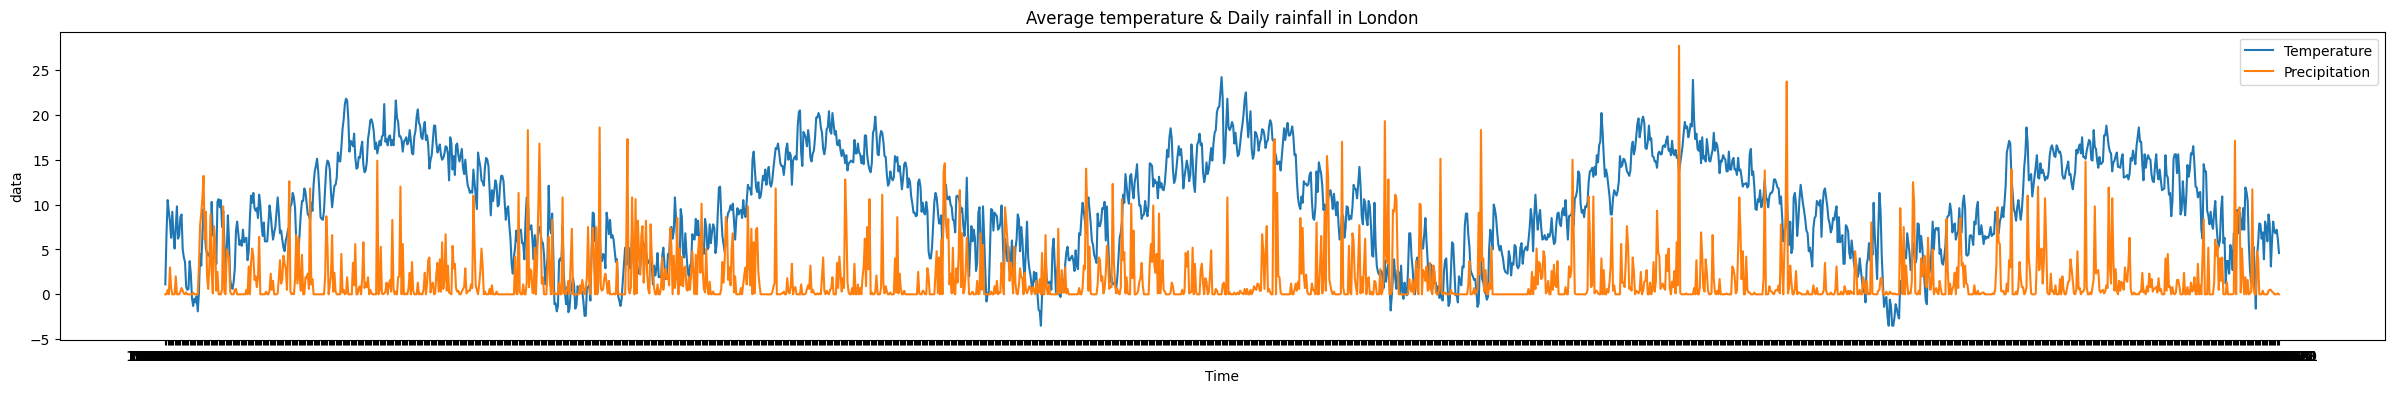

In [144]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    
    for i, y in enumerate(ys):
        ax.plot(x, y, label=legend[i])
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    
    return fig, ax

x = time_series['time']
ys = [time_series['temperature_2m_mean'], time_series['precipitation_sum']]

fig, ax = lineplots(x, ys, "Average temperature & Daily rainfall in London","Time","data", ["Temperature","Precipitation"])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


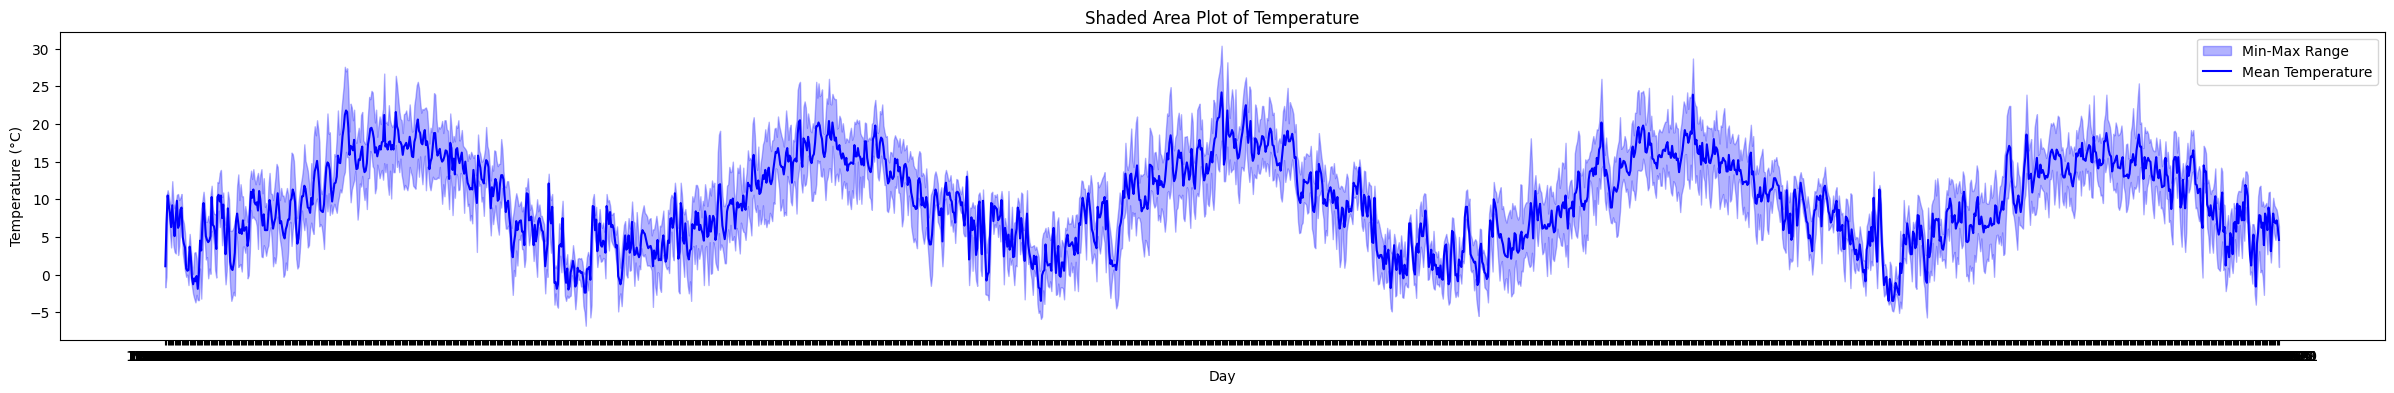

In [148]:
# add your code here

def shaded_area_plot(x, mean_temp, min_temp, max_temp, title, x_label, y_label):
    fig, ax = plt.subplots(1, figsize=(30,4))

    ax.fill_between(x, min_temp, max_temp, color='blue', alpha=0.3, label='Min-Max Range')
    ax.plot(x, mean_temp, color='blue', label='Mean Temperature')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

    return fig, ax

x = time_series['time']
mean_temp = time_series['temperature_2m_mean']
min_temp = time_series['temperature_2m_min']
max_temp = time_series['temperature_2m_max']
title = "Shaded Area Plot of Temperature"
x_label = "Day"
y_label = "Temperature (°C)"

fig, ax = shaded_area_plot(x, mean_temp, min_temp, max_temp, title, x_label, y_label)
plt.show()


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

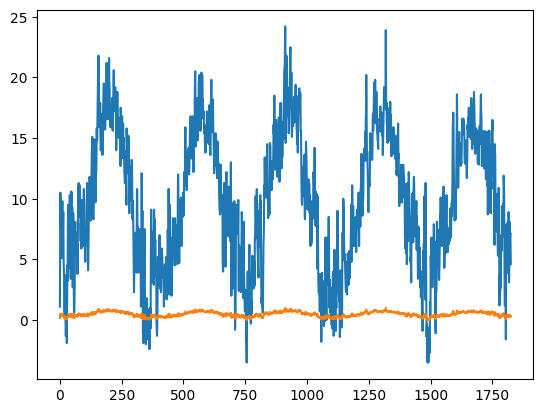

In [103]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    min = np.min(x)
    max = np.max(x)
    norm = (x - min) / (max - min)
    return norm
temperature_mean = time_series['temperature_2m_mean']
normalized_temperature = minmax_norm(temperature_mean)

plt.plot(temperature_mean, label='Original Data')
plt.plot(normalized_temperature, label='Normalized Data')


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

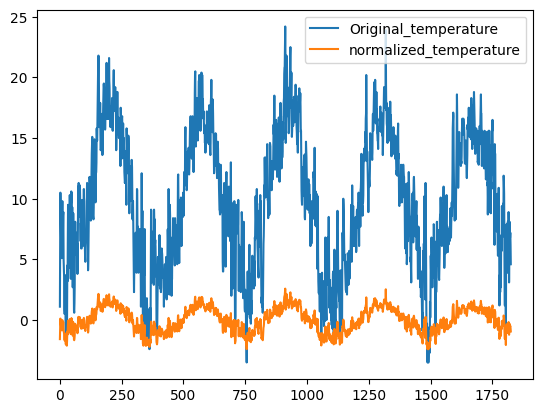

In [121]:
import pandas as pd
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    mean =np.mean(x)
    std = np.std(x)
    norm = (x - mean) / std
    return norm

x = time_series['temperature_2m_mean']
normalized_x = zscore_norm(x)

plt.plot(x, label='Original_temperature')
plt.plot(normalized_x, label = 'normalized_temperature')
plt.legend()

plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [111]:
def zscore_outliers(x: ArrayLike, threshold: float=2.3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    z_scores = (x - np.mean(x)) / np.std(x)
    outlier = np.where(np.abs(z_scores) > threshold)[0]
    return outlier


data = time_series['temperature_2m_mean']

outlier = zscore_outliers(data, threshold=2.3)
print("Outlier:", outlier)




Outlier: [ 756  912 1319 1488 1491 1492]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

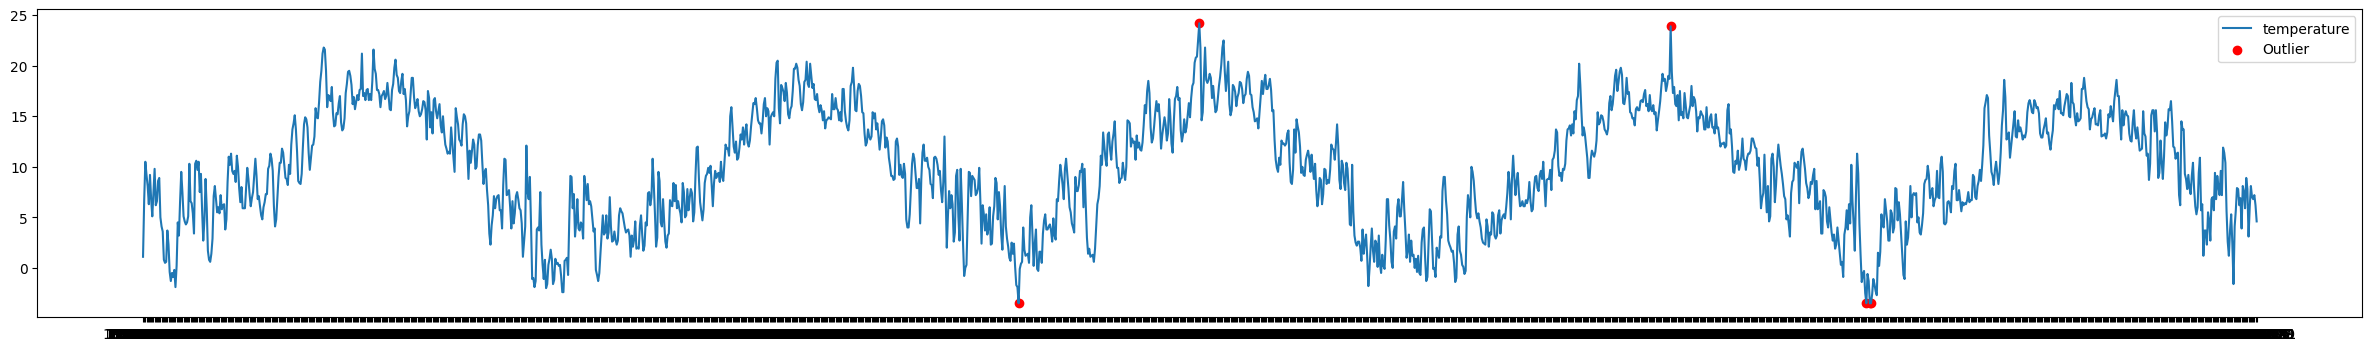

In [149]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    x_outliers = [x[i] for i in outliers_idx]
    y_outliers = [y[i] for i in outliers_idx]
    
    ax.scatter(x_outliers, y_outliers, c ='red', marker = 'o', label = 'Outlier')
    return ax.figure, ax

x = time_series['time']
y = time_series['temperature_2m_mean']
outlier_indices = outlier

fig, ax = plt.subplots(1, figsize=(30,4))
ax.plot(x,y,label = 'temperature')
fig, ax = mark_outliers(ax, x, y, outlier_indices)
ax.legend()
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


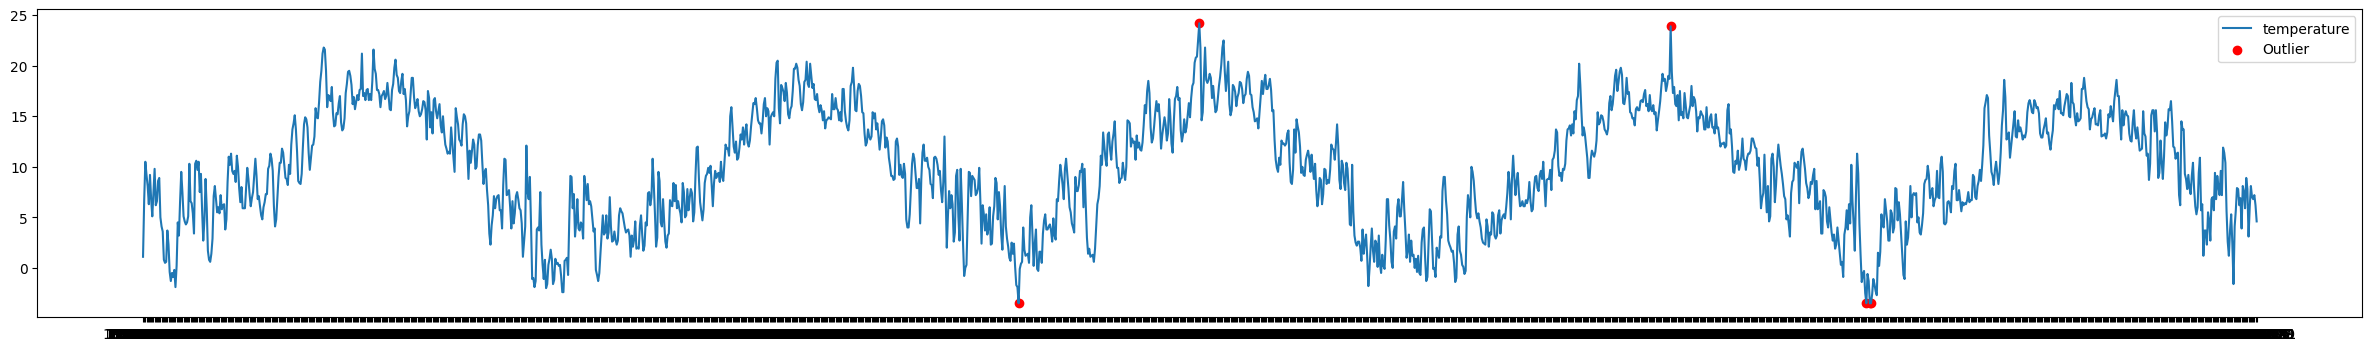

In [150]:
def iqr_detect(x: ArrayLike, threshold: float=1) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    IQR = q3 - q1
    up = q3 + threshold * IQR
    down = q1 - threshold * IQR

    outlier = np.where((x < down) | (x > up))[0]

    return outlier

x = time_series['time']
y = time_series['temperature_2m_mean']
outlier_y = iqr_detect(y, threshold=1)

fig, ax = plt.subplots(1, figsize = (30,4))
ax.plot(x,y,label = 'temperature')
fig, ax = mark_outliers(ax, x, y, outlier_y)
ax.legend()
plt.show()



    


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


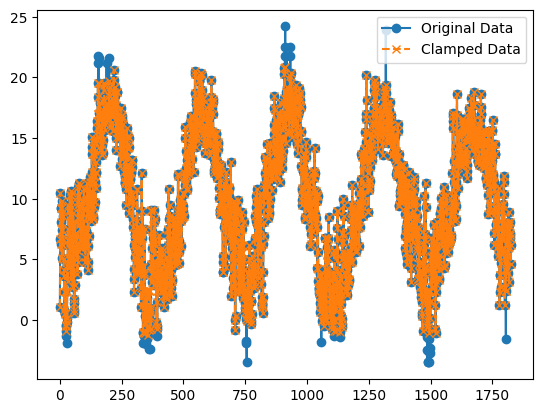

In [135]:
def zscore_clamp(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    z_scores = (x - np.mean(x)) / np.std(x)
    outlier = np.where(np.abs(z_scores) > threshold)

    p10, p90 = np.percentile(x, [10, 90])

    clamped_data = x.copy()
    clamped_data[outlier] = np.clip(clamped_data[outlier], p10, p90)

    return clamped_data

data = np.array(time_series['temperature_2m_mean'])
clamped_data = zscore_clamp(data, threshold = 2)
plt.plot(data, label='Original Data', marker='o', linestyle='-')
plt.plot(clamped_data, label='Clamped Data', marker='x', linestyle='--')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


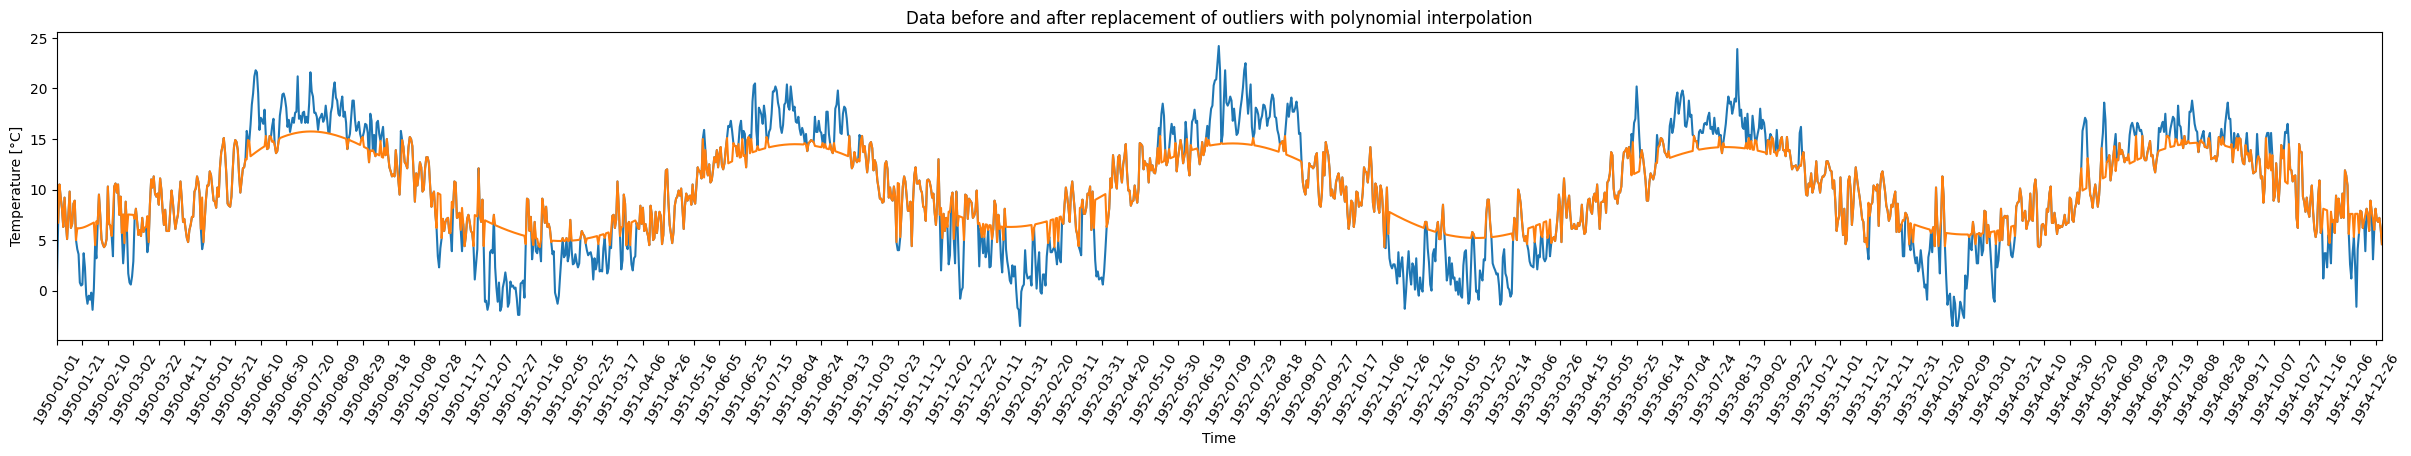

In [156]:

def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # make sure that the data is an array
    x = np.array(x)
    y = np.array(y)

    # get the outliers indices
    outliers_idx = zscore_outliers(y, threshold=1)

    # get the boolean array that is True if a value is an outlier and False otherwise
    is_outlier = np.array([False] * len(x))
    is_outlier[outliers_idx] = True

    # get only the non-outliers
    clean_data = y[np.logical_not(is_outlier)]

    # convert the time string into an integer
    x = np.arange(len(x))
    clean_time = x[np.logical_not(is_outlier)]

    # fit the interpolation model to the data
    model = np.polynomial.Polynomial.fit(clean_time, clean_data, deg=deg)

    interpolated = np.copy(y)
    for idx in np.nonzero(is_outlier):
        interpolated[idx] = model(idx)

    # return the output
    return interpolated


# get the data
x = time_series['time']
y = time_series['temperature_2m_mean']

# get the interpolated data
interpolated = zscore_interp(x, y, deg=21)

# plot both data overlayed
fig, ax = lineplot(x, y, "Data before and after replacement of outliers with polynomial interpolation", "Time", "Temperature [°C]")

# add the clamped data on top
ax.plot(x, interpolated)
plt.show()